### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [195]:
data = pd.read_csv('data/coupons.csv')

In [253]:
data.head()
print(len(data))


12684


2. Investigate the dataset for missing or problematic data.

In [254]:
# the code below counts and percentages of missisng values based on this we can choose what to do with missing values 
# Total number of rows in the DataFrame
total_rows = len(data)

# Count the number of missing values in each column
missing_counts = data.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_counts / total_rows) * 100

# Combine missing counts and percentages into a single DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentage
})

# Sort by the count of missing values in descending order
missing_summary = missing_summary.sort_values(by='Missing Count', ascending=False)

# Display the top columns with the most missing values
print(missing_summary.head(10))



                      Missing Count  Missing Percentage
car                           12576           99.148534
CoffeeHouse                     217            1.710817
Restaurant20To50                189            1.490066
CarryAway                       151            1.190476
RestaurantLessThan20            130            1.024913
Bar                             107            0.843582
weather                           0            0.000000
temperature                       0            0.000000
destination                       0            0.000000
passanger                         0            0.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [161]:
# Drop data where missing values or less than 2 % as this will not Significantly change the analysis 
data = data.dropna(subset=['Bar'])
data = data.dropna(subset=['CoffeeHouse'])
data = data.dropna(subset=['Restaurant20To50'])
data = data.dropna(subset=['CarryAway'])
data = data.dropna(subset=['RestaurantLessThan20'])





4. What proportion of the total observations chose to accept the coupon?



In [255]:
# Count the total number of observations
total_observations = len(data)
print(total_observations)
# Count the number of observations where Y = 1
accepted_coupons = data['Y'].sum()

# Calculate the proportion of accepted coupons
proportion_accepted = accepted_coupons / total_observations

# Display the result as a percentage
print(f"Proportion of accepted coupons: {proportion_accepted:.2%}")


12684
Proportion of accepted coupons: 56.84%


5. Use a bar plot to visualize the `coupon` column.

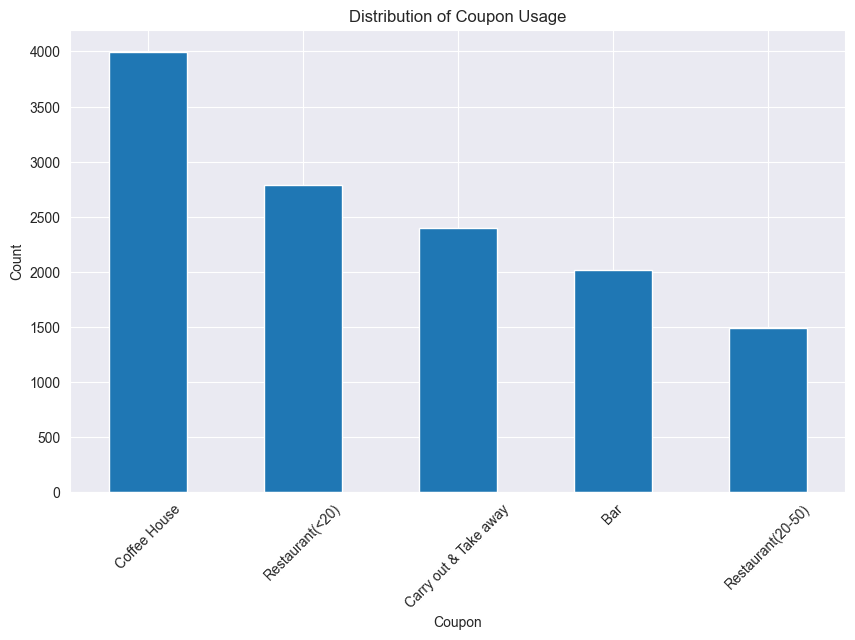

In [256]:
# using plt
# Count the occurrences of each unique value in the 'coupon' column
coupon_counts = data['coupon'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
coupon_counts.plot(kind='bar')
plt.title('Distribution of Coupon Usage')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


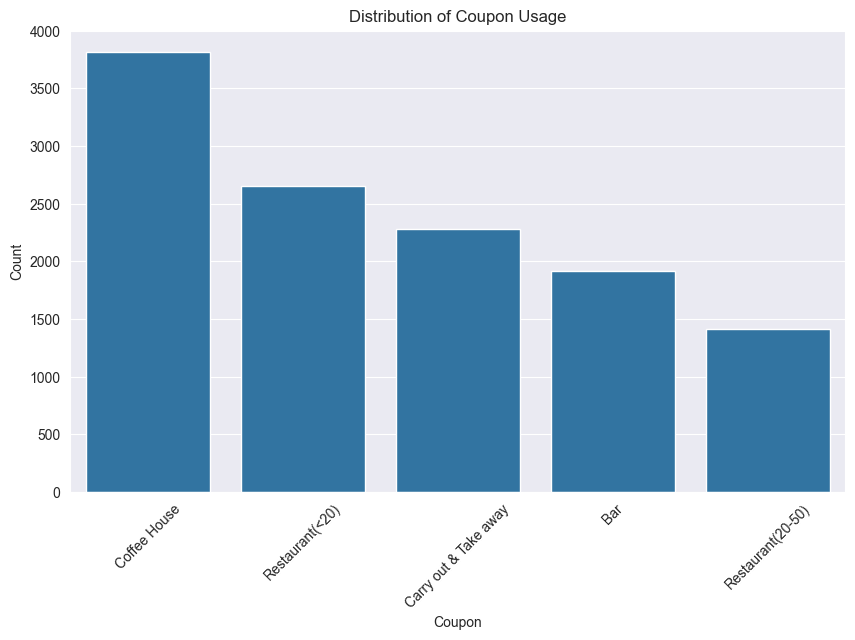

In [165]:
# using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='coupon', order=data['coupon'].value_counts().index)
plt.title('Distribution of Coupon Usage')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


6. Use a histogram to visualize the temperature column.

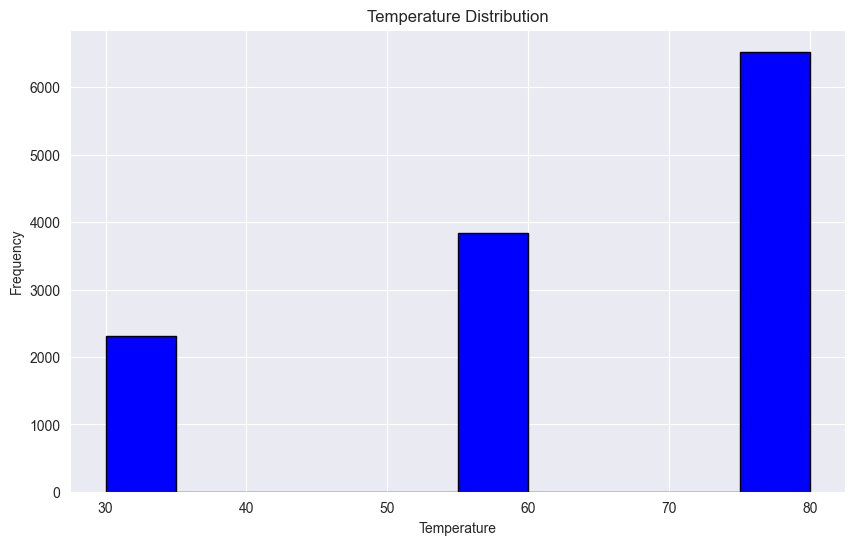

In [257]:
import matplotlib.pyplot as plt

# Plot a histogram for the 'temperature' column
plt.figure(figsize=(10, 6))
plt.hist(data['temperature'], bins=10, color='blue', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()



**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [258]:
bar_coupons = data[data['coupon'] == 'Bar']
print(len(bar_coupons))

2017


2. What proportion of bar coupons were accepted?


In [259]:
# Count the total number of observations
total_barcoupons = len(bar_coupons)
print(total_barcoupons)
# Count the number of observations where Y = 1
accepted_barcoupons = bar_coupons['Y'].sum()
print(accepted_barcoupons)

# Calculate the proportion of accepted coupons
proportion_barcouponsaccepted = accepted_barcoupons / total_barcoupons

# Display the result as a percentage
print(f"Proportion of accepted coupons: {proportion_barcouponsaccepted:.2%}")

2017
827
Proportion of accepted coupons: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [260]:
# Total rows for each group
total_less_than_3 = len(bar_coupons[bar_coupons['Bar'].isin(['less1', '1~3', 'never'])])
total_more_than_3 = len(bar_coupons[bar_coupons['Bar'].isin(['gt8', '4~8'])])

accepted_bar_coupons_less_than_3 = len(bar_coupons[(bar_coupons['Bar'].isin(['less1', '1~3', 'never'])) & (bar_coupons['Y'] == 1)])
accepted_bar_coupons_more_than_3 = len(bar_coupons[(bar_coupons['Bar'].isin(['gt8', '4~8'])) & (bar_coupons['Y'] == 1)])

# Calculate acceptance rates
acceptance_rate_less_than_3 = (accepted_bar_coupons_less_than_3 / total_less_than_3) * 100
acceptance_rate_more_than_3 = (accepted_bar_coupons_more_than_3 / total_more_than_3) * 100

# Print the results
print(f"Acceptance rate for those who went to a bar less than  3 times a month: {acceptance_rate_less_than_3:.2f}%")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_more_than_3:.2f}%")


Acceptance rate for those who went to a bar less than  3 times a month: 37.06%
Acceptance rate for those who went to a bar more than 3 times a month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [248]:
# Total rows for each group
Drivers_above_age_25 = len(bar_coupons[bar_coupons['Bar'].isin(['1~3','gt8', '4~8' ]) & (bar_coupons['age'].isin(['46', '26', '31', '50plus', '41', '36']))])
Drivers_all_others = len(bar_coupons[bar_coupons['Bar'].isin(['1~3','gt8', '4~8' ]) & (bar_coupons['age'].isin(['21', 'below21']))])

# Accepted Coupons 
Accepted_Drivers_above_age_25 = len(bar_coupons[bar_coupons['Bar'].isin(['1~3','gt8', '4~8' ]) & (bar_coupons['age'].isin(['46', '26', '31', '50plus', '41', '36'])) & (bar_coupons['Y'] == 1)])
Accepted_Drivers_all_others = len(bar_coupons[bar_coupons['Bar'].isin(['1~3','gt8', '4~8' ]) & (bar_coupons['age'].isin(['21', 'below21'])) & (bar_coupons['Y'] == 1)])

# Calculate acceptance rates
acceptance_rate_age_25_and_above = (Accepted_Drivers_above_age_25 / Drivers_above_age_25) * 100
acceptance_rate__age_all_others = (Accepted_Drivers_all_others / Drivers_all_others) * 100

# Print Acceptance Rates
print(f'Acceptance rate for age 25 and above: {acceptance_rate_age_25_and_above:.2f}%')
print(f'Acceptance rate age for all others:  {acceptance_rate__age_all_others:.2f}%')


Acceptance rate for age 25 and above: 68.98%
Acceptance rate age for all others:  67.46%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [172]:
# Filter for group: Drivers with passengers NOT kids and occupations NOT farming, fishing, forestry
drivers_more_than_once = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (~bar_coupons['passanger'].isin(['kid(s)', 'Alone'])) &
    (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))
]

# Total rows for this group
total_drivers = len(drivers_more_than_once)

# Filter for accepted coupons (Y == 1) within the group
accepted_drivers = len(drivers_more_than_once[drivers_more_than_once['Y'] == 1])

# Calculate acceptance rate
acceptance_rate = (accepted_drivers / total_drivers) * 100 

# Print the result
print(f"Total Drivers: {total_drivers}")
print(f"Accepted Drivers: {accepted_drivers}")
print(f"Acceptance Rate were not a kid and had occupations other than farming, fishing, or forestry.: {acceptance_rate:.2f}%")



Total Drivers: 231
Accepted Drivers: 151
Acceptance Rate were not a kid and had occupations other than farming, fishing, or forestry.: 65.37%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [249]:
# Filter for group: Drivers with passengers NOT kids and occupations NOT farming, fishing, forestry
once_month_no_kid_and_not_widowed = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (~bar_coupons['passanger'].isin(['kid(s)'])) &
    (~bar_coupons['maritalStatus'].isin(['Widowed']))
]
total_once_month_no_kid_and_not_widowed = len(once_month_no_kid_and_not_widowed)
# Filter for group: Drivers with passengers NOT kids and occupations NOT farming, fishing, forestry
once_month_under_age30 = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['age'].isin(['21', '26','below21']))
]
total_once_month_under_age30 = len(once_month_under_age30)
# Filter for group: Drivers with passengers NOT kids and occupations NOT farming, fishing, forestry
Cheap_restaurants_4times_income_less_than_50k = bar_coupons[
    (bar_coupons['RestaurantLessThan20'].isin(['4~8','gt8']))
]
total_Cheap_restaurants_4times_income_less_than_50k = len(Cheap_restaurants_4times_income_less_than_50k)

accepted_drivers_once_month_no_kid_and_not_widowed = len(once_month_no_kid_and_not_widowed [once_month_no_kid_and_not_widowed ['Y'] == 1])
accepted_drivers_once_month_under_age30 = len(once_month_under_age30[once_month_under_age30['Y'] == 1])
accepted_drivers_Cheap_restaurants_4times_income_less_than_50k = len(Cheap_restaurants_4times_income_less_than_50k [Cheap_restaurants_4times_income_less_than_50k ['Y'] == 1])

acceptance_rate_drivers_once_month_no_kid_and_not_widowed = (accepted_drivers_once_month_no_kid_and_not_widowed / total_once_month_no_kid_and_not_widowed) * 100 
acceptance_rate_once_month_under_age30 =  (accepted_drivers_once_month_under_age30/ total_once_month_under_age30) * 100 
acceptance_rate_Cheap_restaurants_4times_income_less_than_50k  = (accepted_drivers_Cheap_restaurants_4times_income_less_than_50k / total_Cheap_restaurants_4times_income_less_than_50k ) * 100 

print(f'acceptance_rate_once_month_no_kid_and_not_widowed is : {acceptance_rate_drivers_once_month_no_kid_and_not_widowed:.2f}%' )
print(f'acceptance_rate_once_month_under_age30 is: {acceptance_rate_once_month_under_age30:.2f}%')
print(f'acceptance_rate_Cheap_restaurants_4times_income_less_than_50k is:  {acceptance_rate_Cheap_restaurants_4times_income_less_than_50k:.2f}%')


acceptance_rate_once_month_no_kid_and_not_widowed is : 68.53%
acceptance_rate_once_month_under_age30 is: 71.95%
acceptance_rate_Cheap_restaurants_4times_income_less_than_50k is:  42.92%


Created a Dictionary of acceptabce rates and sorted it to understand the data

In [ ]:
# Create a dictionary of acceptance rates
acceptance_rates = {
    "Acceptance rate for those who went to a bar less than 3 times a month": acceptance_rate_less_than_3,
    "Acceptance rate for those who went to a bar more than 3 times a month": acceptance_rate_more_than_3,
    "Acceptance rate for age 25 and above": acceptance_rate_age_25_and_above,
    "Acceptance rate age for all others": acceptance_rate__age_all_others,
    "Acceptance rate not a kid and occupations other than farming, fishing, or forestry": acceptance_rate,
    "Acceptance rate once a month, no kid, and not widowed": acceptance_rate_drivers_once_month_no_kid_and_not_widowed,
    "Acceptance rate once a month under age 30": acceptance_rate_once_month_under_age30,
    "Acceptance rate Cheap restaurants 4 times income less than 50k": acceptance_rate_Cheap_restaurants_4times_income_less_than_50k,
}

# Convert the dictionary to a DataFrame for easy sorting
import pandas as pd
acceptance_rate_df = pd.DataFrame(list(acceptance_rates.items()), columns=["Category", "Acceptance Rate"])

# Sort the DataFrame by "Acceptance Rate" in descending order
sorted_acceptance_rate_df = acceptance_rate_df.sort_values(by="Acceptance Rate", ascending=False)

# Print the sorted DataFrame
print(sorted_acceptance_rate_df)

Visualize this data 

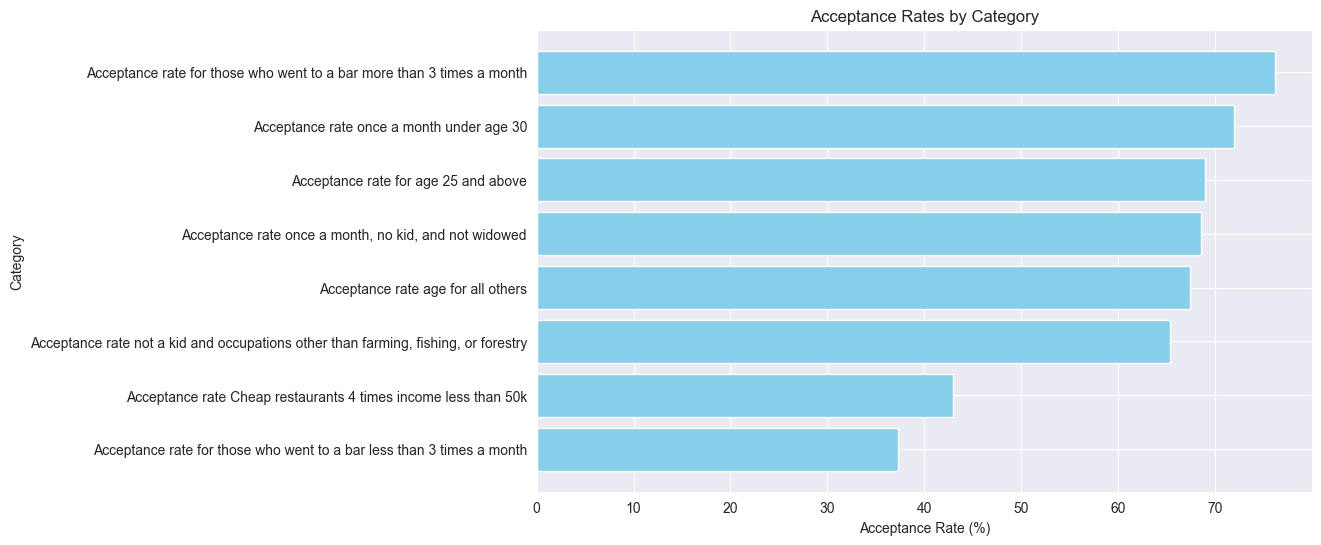

In [178]:
import matplotlib.pyplot as plt

# Sort the dictionary and convert to lists for plotting
sorted_acceptance_rates = dict(sorted(acceptance_rates.items(), key=lambda x: x[1], reverse=True))
categories = list(sorted_acceptance_rates.keys())
rates = list(sorted_acceptance_rates.values())

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(categories, rates, color='skyblue')  # Horizontal bar plot for readability
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Category')
plt.title('Acceptance Rates by Category')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rate at the top
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [180]:
# Hypothesis - o : Overall Probability to accept a bar coupon  is 41 % 
# Hypothesis - 1 : There is a 76 % Probability  that Drivers that went to bar than 3 times a month are like to accept the coupon - this is highest
# Hypothesis - 2 : There is a 71 %  Probability that Drivers that are under the age of 30 that have been at bar at least once are likely - this is second highest category
# Hypothesis - 2 : There is only 37 % Probability that Drivers that go to bar less than 3 times will accept the coupon


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Check for Coupon Acceptance rate based on the destination for Coffee House

In [261]:
import pandas as pd

# Load the data
data_coffee = pd.read_csv('data/coupons.csv')

# Filter for rows where the coupon is for "Coffee House"
coffee_coupons = data_coffee[data_coffee['coupon'] == 'Coffee House']

# Group by 'destination' and calculate total and accepted coupons
grouped = coffee_coupons.groupby('destination').agg(
    total_coupons=('Y', 'size'),  # Count total rows per destination
    accepted_coupons=('Y', 'sum')  # Sum accepted coupons (Y == 1)
)

# Calculate acceptance rates
grouped['acceptance_rate'] = (grouped['accepted_coupons'] / grouped['total_coupons']) * 100
grouped_sorted = grouped.sort_values(by='acceptance_rate', ascending=False) # Sort by Acceptance Rate
# Print the results
print(grouped_sorted)



                 total_coupons  accepted_coupons  acceptance_rate
destination                                                      
No Urgent Place           2155              1252        58.097448
Work                       913               407        44.578313
Home                       928               336        36.206897


In [ ]:
Destination "No Urgent place has Highest acceptance rate for Cofee coupons " check top Destination and Coupon Combinations

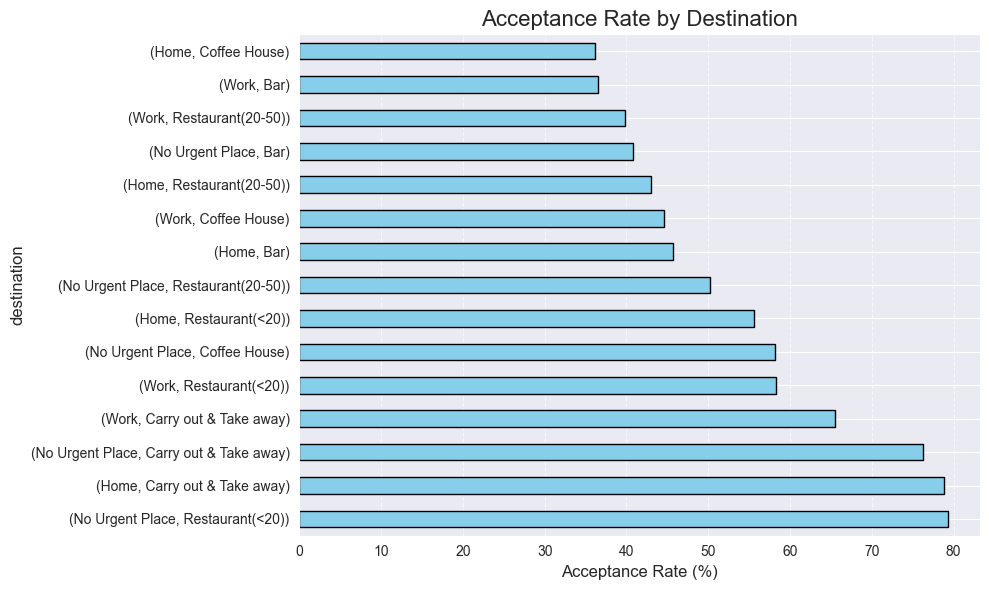

In [273]:
import pandas as pd

# Load the data
data_coffee = pd.read_csv('data/coupons.csv')


# Group by 'destination' and 'coupon' and calculate total and accepted coupons
grouped = data_coffee.groupby(['destination', 'coupon']).agg(
    total_coupons=('Y', 'size'),  # Count total rows per group
    accepted_coupons=('Y', 'sum')  # Sum accepted coupons (Y == 1)
)

# Calculate acceptance rates
grouped['acceptance_rate'] = (grouped['accepted_coupons'] / grouped['total_coupons']) * 100
# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
grouped_sorted['acceptance_rate'].plot(kind='barh', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Acceptance Rate by Destination', fontsize=16)
plt.xlabel('Acceptance Rate (%)', fontsize=12)
plt.ylabel('destination', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()




For Coffee House Coupons what age and gender group is like to accept the coupon

                         total_coupons  accepted_coupons  acceptance_rate
destination     age                                                      
No Urgent Place below21             73                57        78.082192
Work            below21             40                29        72.500000
No Urgent Place 46                 130                83        63.846154
                21                 469               291        62.046908
                26                 460               276        60.000000
                41                 176               100        56.818182
                31                 334               188        56.287425
                36                 212               116        54.716981
Home            below21             42                22        52.380952
Work            36                  93                44        47.311828
                21                 209                98        46.889952
No Urgent Place 50plus             301

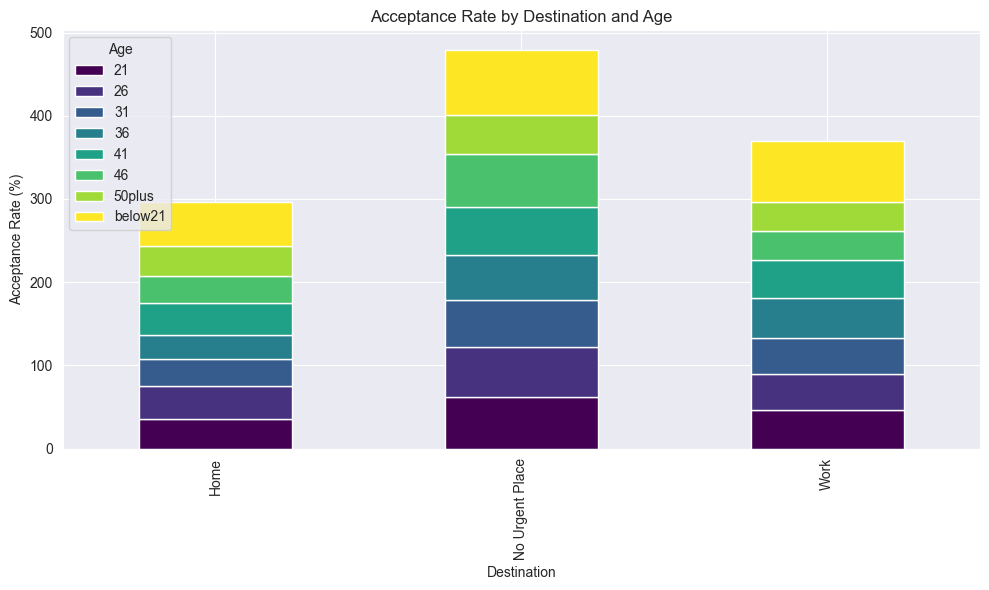

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data
data_coffee = pd.read_csv('data/coupons.csv')

# Filter for rows where the coupon is for "Coffee House"
coffee_coupons = data_coffee[data_coffee['coupon'] == 'Coffee House']

# Group by 'age' and gender calculate total and accepted coupons
grouped = coffee_coupons.groupby(['destination', 'age']).agg(
    total_coupons=('Y', 'size'),  # Count total rows per destination
    accepted_coupons=('Y', 'sum')  # Sum accepted coupons (Y == 1)
)

# Calculate acceptance rates
grouped['acceptance_rate'] = (grouped['accepted_coupons'] / grouped['total_coupons']) * 100
grouped_sorted = grouped.sort_values(by='acceptance_rate', ascending=False) # Sort by Acceptance Rate
# Print the results
print(grouped_sorted)



# Reset the index to make 'destination' and 'age' columns available
grouped_sorted_reset = grouped_sorted.reset_index()

# Pivot the data to create a matrix for stacking
pivot_data = grouped_sorted_reset.pivot(index='destination', columns='age', values='acceptance_rate')

# Plot a stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Acceptance Rate by Destination and Age')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate (%)')
plt.legend(title='Age')
plt.tight_layout()
plt.show()

# below21 Male are 83% likely to accept  Coffe house coupon, 

Is income a factor to accept cofeehouse coupns

                  total_coupons  accepted_coupons  acceptance_rate
income                                                            
$87500 - $99999             271               151        55.719557
Less than $12500            308               170        55.194805
$37500 - $49999             590               320        54.237288
$12500 - $24999             594               321        54.040404
$50000 - $62499             548               276        50.364964
$100000 or More             534               264        49.438202
$25000 - $37499             640               303        47.343750
$62500 - $74999             275               120        43.636364
$75000 - $87499             236                70        29.661017


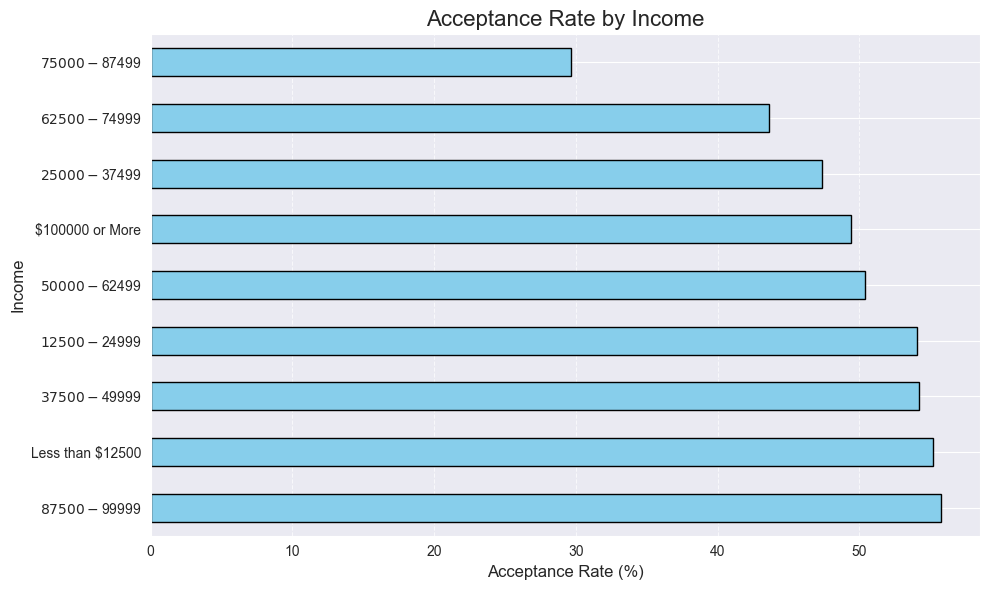

In [275]:
import pandas as pd

# Load the data
data_coffee = pd.read_csv('data/coupons.csv')

# Filter for rows where the coupon is for "Coffee House"
coffee_coupons = data_coffee[data_coffee['coupon'] == 'Coffee House']

# Group by 'income' and calculate total and accepted coupons
grouped = coffee_coupons.groupby(['income']).agg(
    total_coupons=('Y', 'size'),  # Count total rows per destination
    accepted_coupons=('Y', 'sum')  # Sum accepted coupons (Y == 1)
)

# Calculate acceptance rates
grouped['acceptance_rate'] = (grouped['accepted_coupons'] / grouped['total_coupons']) * 100
grouped_sorted = grouped.sort_values(by='acceptance_rate', ascending=False) # Sort by Acceptance Rate
# Print the results
print(grouped_sorted)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
grouped_sorted['acceptance_rate'].plot(kind='barh', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Acceptance Rate by Income', fontsize=16)
plt.xlabel('Acceptance Rate (%)', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Income is not a factor if you will accept a coffehouse coupon

                   total_coupons  accepted_coupons  acceptance_rate
maritalStatus                                                      
Divorced                     151                79        52.317881
Single                      1550               800        51.612903
Married partner             1541               760        49.318624
Unmarried partner            717               343        47.838215
Widowed                       37                13        35.135135


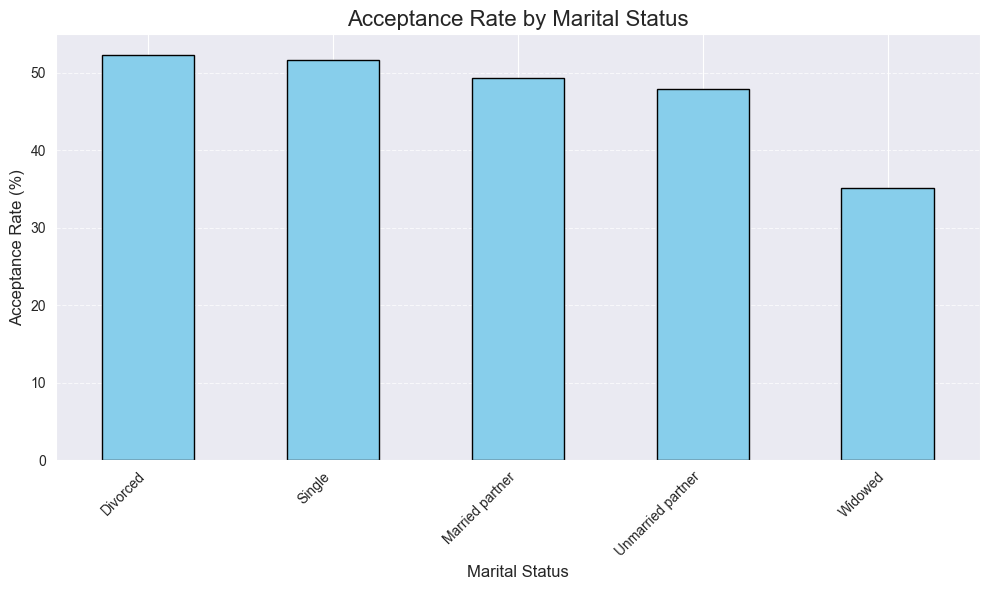

In [276]:
import pandas as pd

# Load the data
data_coffee = pd.read_csv('data/coupons.csv')

# Filter for rows where the coupon is for "Coffee House"
coffee_coupons = data_coffee[data_coffee['coupon'] == 'Coffee House']

# Group by 'income' and calculate total and accepted coupons
grouped = coffee_coupons.groupby(['maritalStatus']).agg(
    total_coupons=('Y', 'size'),  # Count total rows per destination
    accepted_coupons=('Y', 'sum')  # Sum accepted coupons (Y == 1)
)

# Calculate acceptance rates
grouped['acceptance_rate'] = (grouped['accepted_coupons'] / grouped['total_coupons']) * 100
grouped_sorted = grouped.sort_values(by='acceptance_rate', ascending=False) # Sort by Acceptance Rate
# Print the results
print(grouped_sorted)

import matplotlib.pyplot as plt

# Plot the acceptance rates
plt.figure(figsize=(10, 6))
grouped_sorted['acceptance_rate'].plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Acceptance Rate by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Acceptance Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Income is not a factor if you will accept a coffehouse coupon

                                        total_coupons  accepted_coupons  \
education                                                                 
Some High School                                   28                17   
High School Graduate                              279               151   
Associates degree                                 350               181   
Some college - no degree                         1371               707   
Graduate degree (Masters or Doctorate)            598               305   
Bachelors degree                                 1370               634   

                                        acceptance_rate  
education                                                
Some High School                              60.714286  
High School Graduate                          54.121864  
Associates degree                             51.714286  
Some college - no degree                      51.568198  
Graduate degree (Masters or Doctorate)        51.00

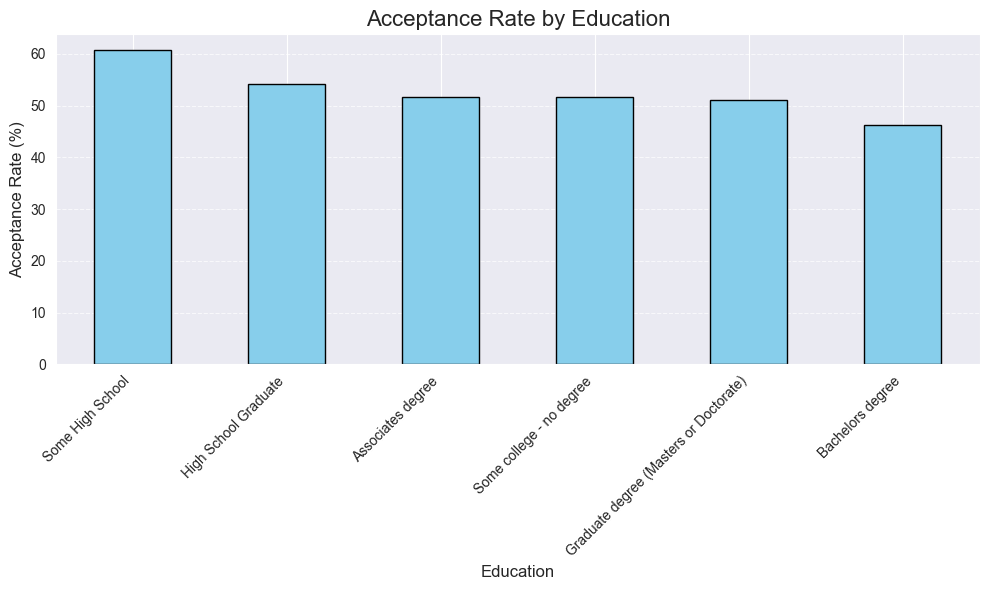

In [277]:
import pandas as pd

# Load the data
data_coffee = pd.read_csv('data/coupons.csv')

# Filter for rows where the coupon is for "Coffee House"
coffee_coupons = data_coffee[data_coffee['coupon'] == 'Coffee House']

# Group by 'income' and calculate total and accepted coupons
grouped = coffee_coupons.groupby(['education']).agg(
    total_coupons=('Y', 'size'),  # Count total rows per destination
    accepted_coupons=('Y', 'sum')  # Sum accepted coupons (Y == 1)
)

# Calculate acceptance rates
grouped['acceptance_rate'] = (grouped['accepted_coupons'] / grouped['total_coupons']) * 100
grouped_sorted = grouped.sort_values(by='acceptance_rate', ascending=False) # Sort by Acceptance Rate
# Print the results
print(grouped_sorted)

import matplotlib.pyplot as plt

# Plot the acceptance rates
plt.figure(figsize=(10, 6))
grouped_sorted['acceptance_rate'].plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Acceptance Rate by Education', fontsize=16)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Acceptance Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


# Income is not a factor if you will accept a coffehouse coupon

In [ ]:
#Hypothesis -1 No Urgent place destination has higher acceptance for Coffee House Coupon
#Hypothesis -2 However For destination No Urgent Place coupon "Restaurant(<20)" is 20% higher acceptance than Coffe House Coupon    
#Hypothesis -3 Gender : Male and  age : below21 are 83% likely to accept coffee house coupon
#Hypothesis -4 Income levels are not a significant factor for Coffe house coupons the percebtages are centered around within + or - 3 stdev
#Hypothesis -5 - Education : 'Some high school education' has higher acceptance for Coffee House Coupon

